In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


In [3]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 10.1 MB/s eta 0:00:00


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMZN.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-12,89.799500,90.049004,88.849998,89.246002,89.246002,58110000
1,2019-08-13,89.150002,91.586998,89.000000,91.217003,91.217003,79880000
2,2019-08-14,89.650497,89.782501,87.861000,88.148003,88.148003,97872000
3,2019-08-15,89.099503,89.400002,88.098000,88.806000,88.806000,75182000
4,2019-08-16,89.644501,90.145500,89.227501,89.628502,89.628502,60360000


In [5]:
results=pd.DataFrame(columns=['Model','R2 Score',"Mean Absolute Error","Mean Squared Error"])


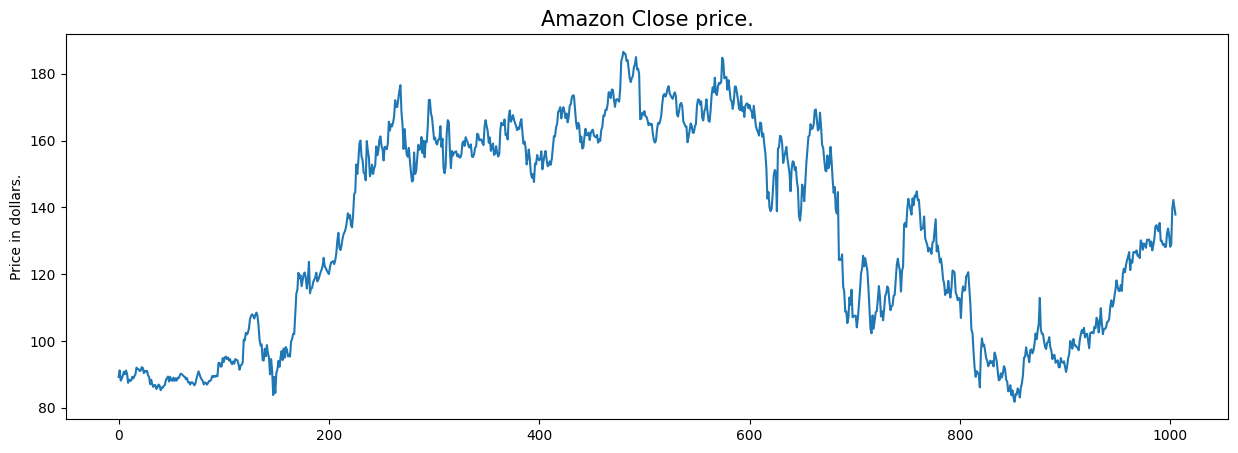

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Amazon Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

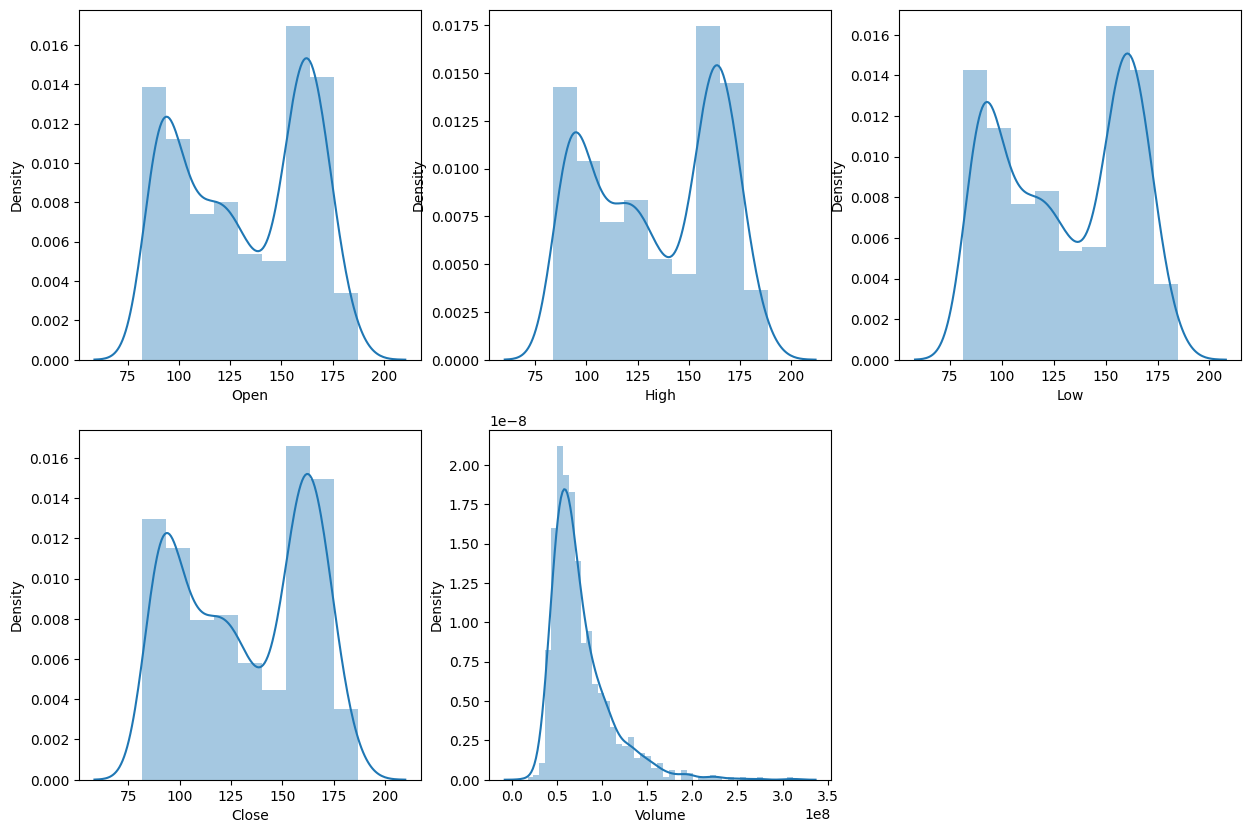

In [7]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(15,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


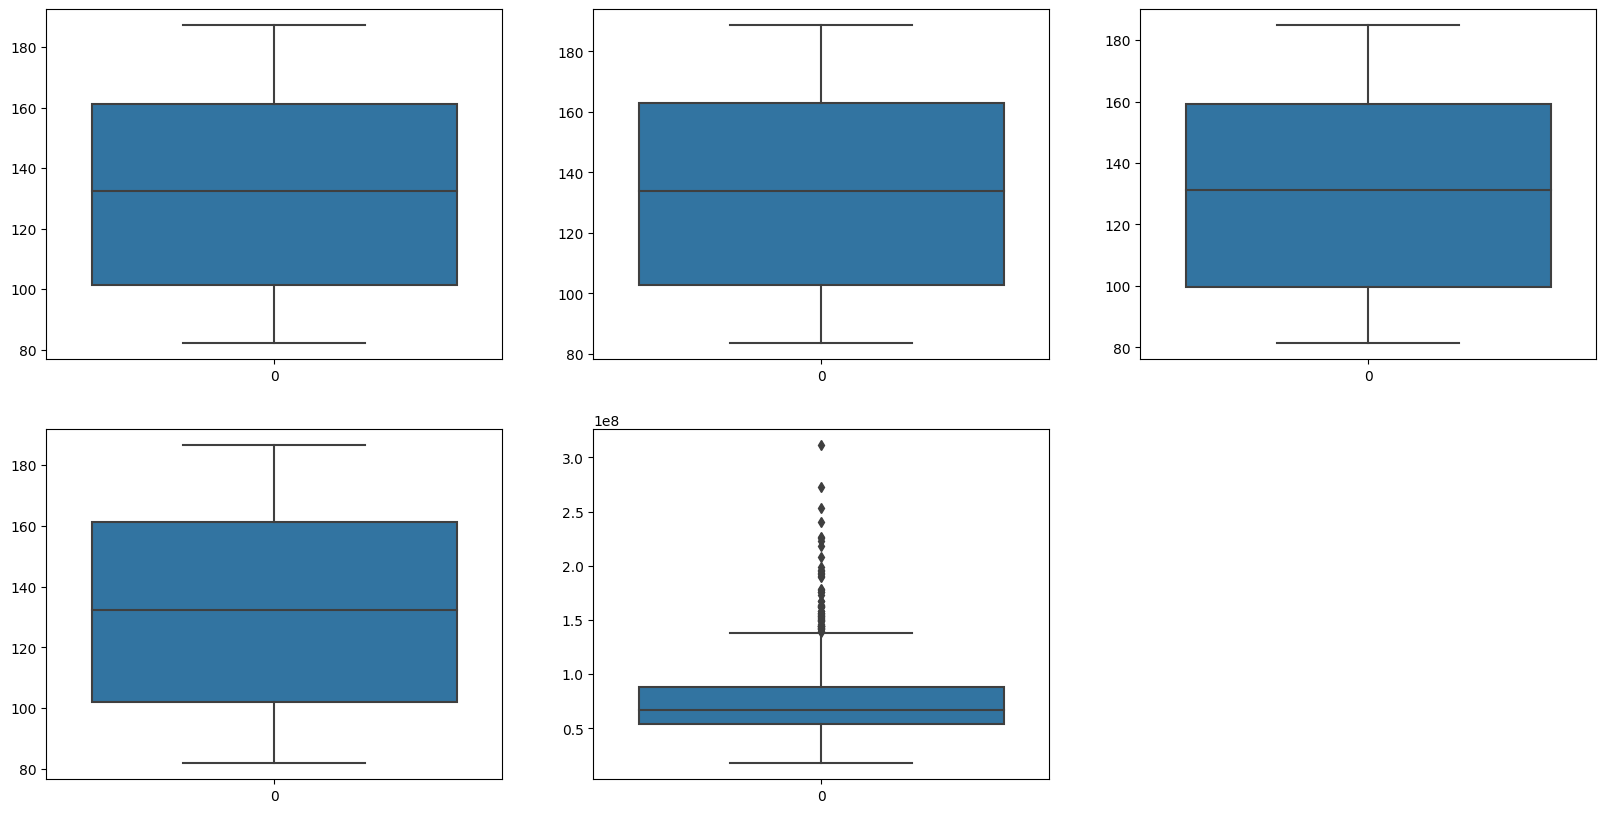

In [8]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


In [9]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2019-08-12,89.799500,90.049004,88.849998,89.246002,89.246002,58110000,8,2019,12
1,2019-08-13,89.150002,91.586998,89.000000,91.217003,91.217003,79880000,8,2019,13
2,2019-08-14,89.650497,89.782501,87.861000,88.148003,88.148003,97872000,8,2019,14
3,2019-08-15,89.099503,89.400002,88.098000,88.806000,88.806000,75182000,8,2019,15
4,2019-08-16,89.644501,90.145500,89.227501,89.628502,89.628502,60360000,8,2019,16


In [10]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2019-08-12,89.799500,90.049004,88.849998,89.246002,89.246002,58110000,8,2019,12,1
1,2019-08-13,89.150002,91.586998,89.000000,91.217003,91.217003,79880000,8,2019,13,1
2,2019-08-14,89.650497,89.782501,87.861000,88.148003,88.148003,97872000,8,2019,14,1
3,2019-08-15,89.099503,89.400002,88.098000,88.806000,88.806000,75182000,8,2019,15,1
4,2019-08-16,89.644501,90.145500,89.227501,89.628502,89.628502,60360000,8,2019,16,1


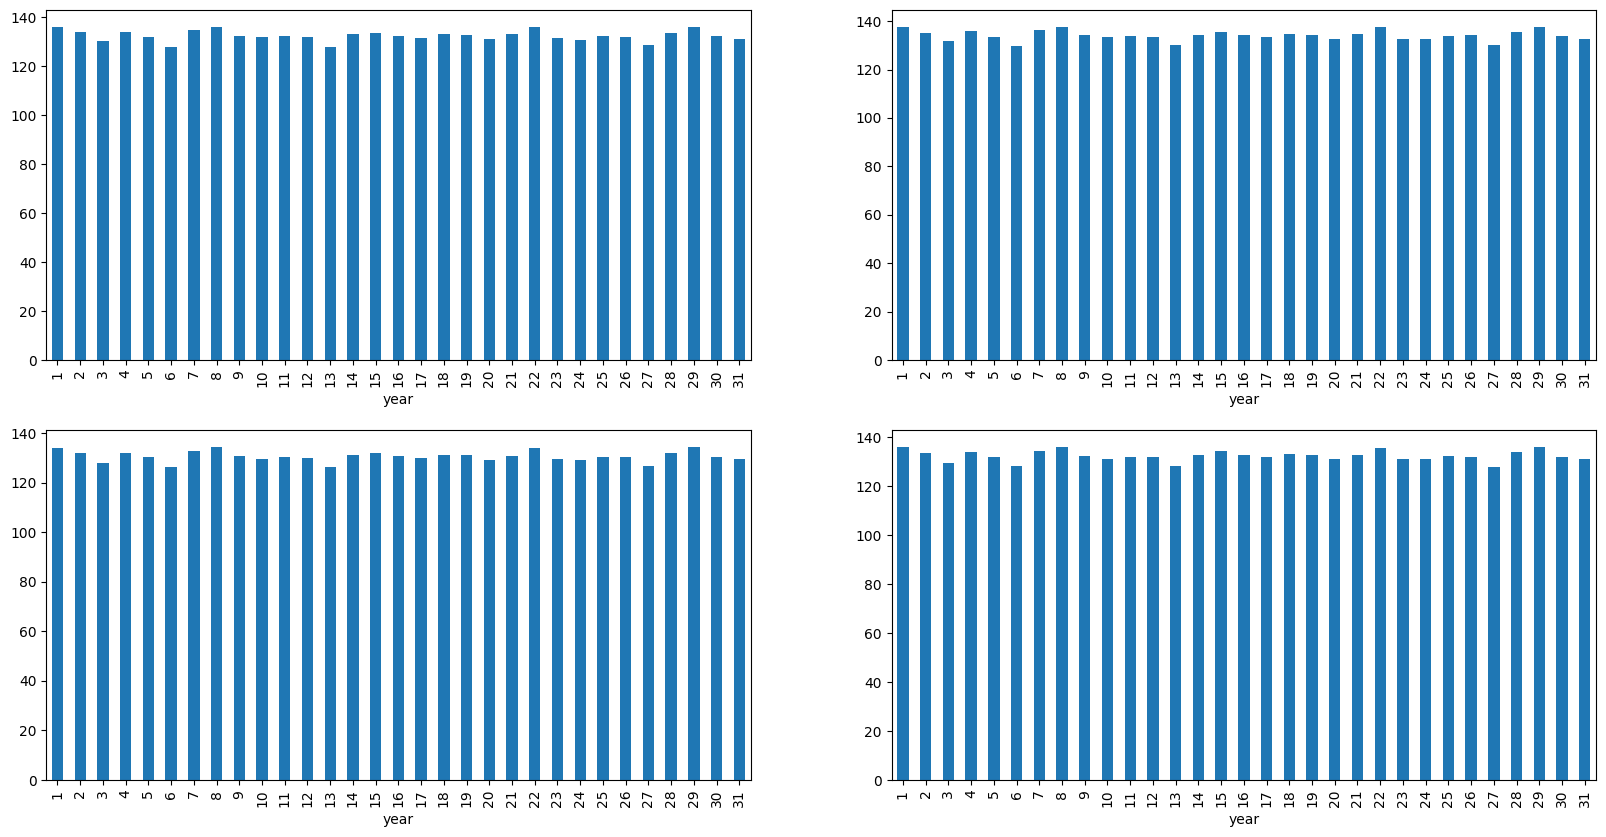

In [11]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [12]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,141.281415,142.973318,139.546164,141.281343,141.281343,7.885708e+07,6.021341,2021.074695,15.650915
1,115.756573,117.420489,113.833007,115.583300,115.583300,7.168213e+07,7.560000,2021.151429,15.877143


In [13]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


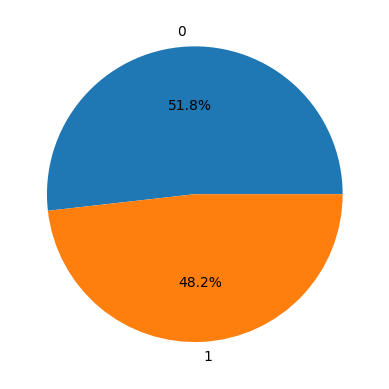

In [14]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


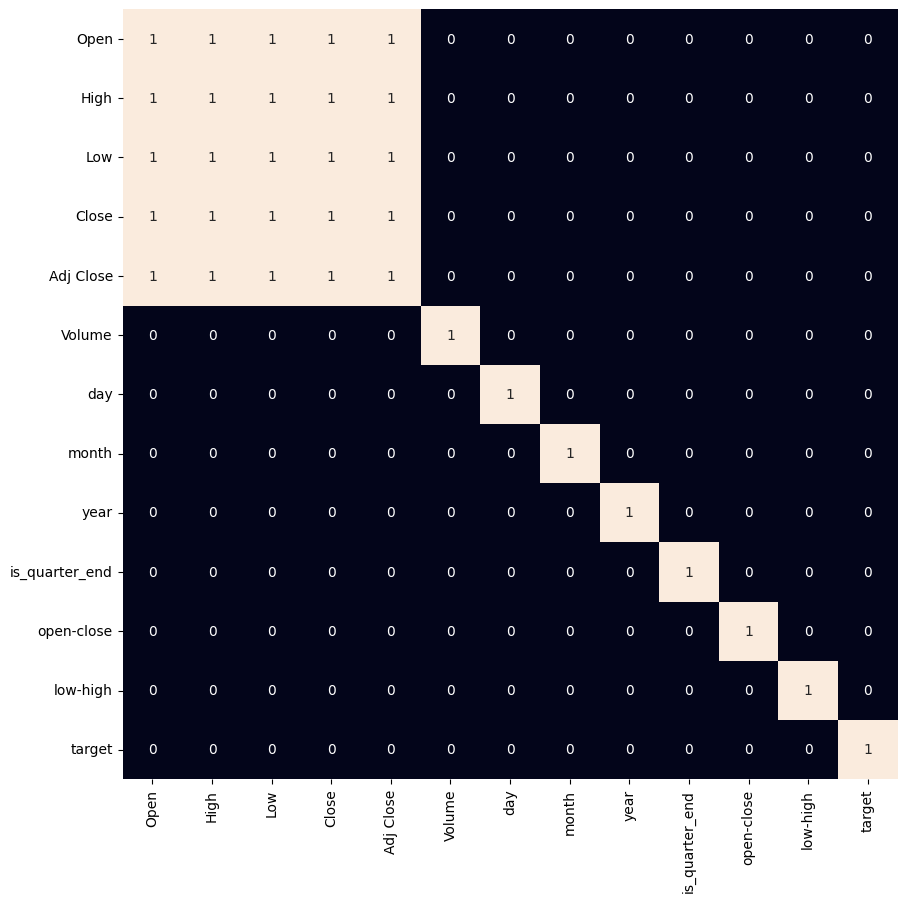

In [15]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-12,89.799500,90.049004,88.849998,89.246002,89.246002,58110000
1,2019-08-13,89.150002,91.586998,89.000000,91.217003,91.217003,79880000
2,2019-08-14,89.650497,89.782501,87.861000,88.148003,88.148003,97872000
3,2019-08-15,89.099503,89.400002,88.098000,88.806000,88.806000,75182000
4,2019-08-16,89.644501,90.145500,89.227501,89.628502,89.628502,60360000


In [17]:
from datetime import datetime as dt
import urllib.request
import json
import pandas as pd
dataframes = []
url = "https://query2.finance.yahoo.com/v1/finance/esgChart?symbol=AMZN"

connection = urllib.request.urlopen(url)

data = connection.read()
data_2 = json.loads(data)
esg_raw = data_2["esgChart"]["result"][0]["symbolSeries"]
esg_data = pd.DataFrame(esg_raw)
esg_data["timestamp"] = pd.to_datetime(esg_data["timestamp"], unit="s").dt.strftime('%Y-%m-%d')
esg_data.rename(columns = {'timestamp' : 'Date'}, inplace = True)
esg_data
# 2014-09-01 ~ 2022-08-01
esg_data=esg_data.sort_values('Date',ascending=False)

In [18]:
df = pd.merge(df, esg_data, on=['Date'],how='left')
df.fillna(method='bfill',inplace=True)
df.fillna(method='ffill',inplace=True)

In [19]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,esgScore,governanceScore,environmentScore,socialScore
1001,2023-08-03,127.480003,129.839996,126.410004,128.910004,128.910004,88585200,30.28,9.89,5.59,14.8
1002,2023-08-04,141.059998,143.630005,139.320007,139.570007,139.570007,152938700,30.28,9.89,5.59,14.8
1003,2023-08-07,140.990005,142.539993,138.949997,142.220001,142.220001,71213100,30.28,9.89,5.59,14.8
1004,2023-08-08,140.619995,140.839996,138.419998,139.940002,139.940002,51710500,30.28,9.89,5.59,14.8
1005,2023-08-09,139.970001,140.320007,137.100006,137.850006,137.850006,49972700,30.28,9.89,5.59,14.8


In [20]:
df.drop(columns=['Adj Close','governanceScore','environmentScore','socialScore'],inplace=True)

In [21]:
train = df.iloc[0:int(len(df)*0.8), :]
test =  df.iloc[int(len(df)*0.8):, :]

In [22]:
X_train, Y_train = [], []
for i in range(len(train) - 3):
  a = train.iloc[i:(i + 3), 4]
  X_train.append(a)
  Y_train.append(train.iloc[i + 3, 4])

In [23]:
X_test, Y_test = [], []
for i in range(len(test) - 3):
  a = test.iloc[i:(i + 3), 4]
  X_test.append(a)
  Y_test.append(test.iloc[i + 3, 4])

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100,  activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [26]:
model.compile(loss='mae', optimizer='adam')

In [27]:
history = model.fit(X_train, Y_train, epochs=12, batch_size=100, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/12
7/7 - 9s - loss: 140.5182 - val_loss: 126.6017 - 9s/epoch - 1s/step
Epoch 2/12
7/7 - 0s - loss: 137.7236 - val_loss: 123.5409 - 112ms/epoch - 16ms/step
Epoch 3/12
7/7 - 0s - loss: 132.8293 - val_loss: 117.8788 - 136ms/epoch - 19ms/step
Epoch 4/12
7/7 - 0s - loss: 126.1530 - val_loss: 110.6947 - 125ms/epoch - 18ms/step
Epoch 5/12
7/7 - 0s - loss: 117.2832 - val_loss: 100.7723 - 154ms/epoch - 22ms/step
Epoch 6/12
7/7 - 0s - loss: 103.9962 - val_loss: 85.2405 - 131ms/epoch - 19ms/step
Epoch 7/12
7/7 - 0s - loss: 84.4474 - val_loss: 64.9269 - 166ms/epoch - 24ms/step
Epoch 8/12
7/7 - 0s - loss: 60.2074 - val_loss: 39.6242 - 195ms/epoch - 28ms/step
Epoch 9/12
7/7 - 0s - loss: 29.4528 - val_loss: 6.8645 - 273ms/epoch - 39ms/step
Epoch 10/12
7/7 - 0s - loss: 8.9270 - val_loss: 11.7091 - 130ms/epoch - 19ms/step
Epoch 11/12
7/7 - 0s - loss: 7.0768 - val_loss: 4.4270 - 142ms/epoch - 20ms/step
Epoch 12/12
7/7 - 0s - loss: 6.9127 - val_loss: 4.7636 - 132ms/epoch - 19ms/step


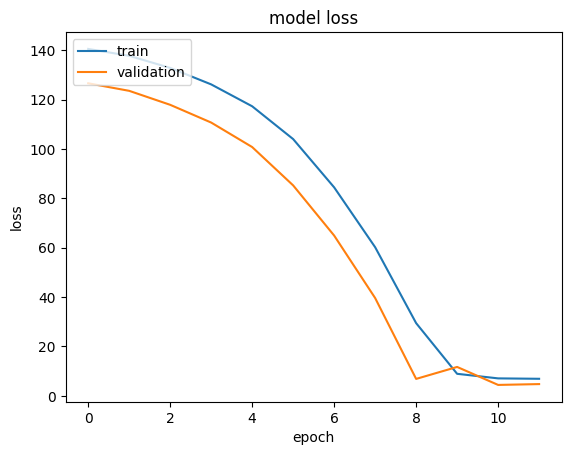

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

7/7 [==============================] - 2s 7ms/step


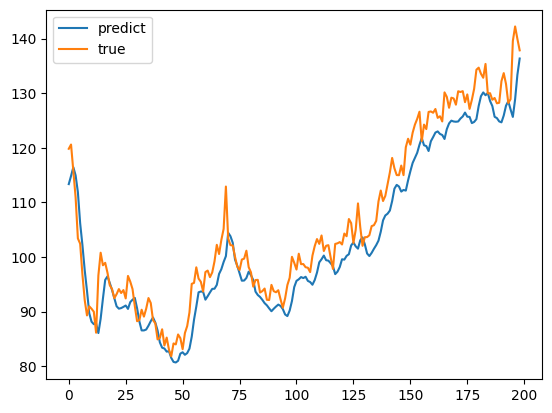

In [29]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(Y_test, label='true')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_pred,Y_test))
results.loc[len(results)]=["NN without tsfresh",r2_score(Y_test,y_pred),mean_absolute_error(Y_test,y_pred),mean_squared_error(Y_test,y_pred)]

0.8999296376052491


In [31]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AMZN.csv')

In [32]:
df['Tommorow']=df['Close'].shift(-1)

In [33]:
df.dropna(inplace=True)

In [34]:
# df.drop(columns=["Adj Close"],inplace=True)

In [35]:
df['id']=df.index

In [36]:
X=df.drop(columns=["Tommorow"])
y=df['Tommorow']

In [37]:
from tsfresh import extract_relevant_features

relevant_features=extract_relevant_features(X,y,column_id="id",column_sort="Date")

Feature Extraction: 100%|██████████| 6030/6030 [03:24<00:00, 29.45it/s]


In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,r2_score,f1_score

X_train, X_test, y_train, y_test = train_test_split(relevant_features,y,test_size=0.2,shuffle=False)
clf = xgb.XGBRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred))
results.loc[len(results)]=["XGBRegressor",r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]

0.9552818259070219


In [39]:
# X_train, X_test, y_train, y_test = train_test_split(relevant_features,y,test_size=0.3,shuffle=False)
# X_train.shape

In [40]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
model = Sequential()

model.add(Dense(128, input_dim=115, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history=model.fit(X_train, y_train ,epochs=50, batch_size=100, validation_split=0.3, verbose=2, shuffle=False)

Epoch 1/50
6/6 - 1s - loss: 295.5417 - val_loss: 140.5577 - 1s/epoch - 188ms/step
Epoch 2/50
6/6 - 0s - loss: 110.2011 - val_loss: 49.6460 - 43ms/epoch - 7ms/step
Epoch 3/50
6/6 - 0s - loss: 127.6743 - val_loss: 313.8148 - 59ms/epoch - 10ms/step
Epoch 4/50
6/6 - 0s - loss: 202.2160 - val_loss: 82.0964 - 44ms/epoch - 7ms/step
Epoch 5/50
6/6 - 0s - loss: 29.0396 - val_loss: 21.1577 - 47ms/epoch - 8ms/step
Epoch 6/50
6/6 - 0s - loss: 60.8713 - val_loss: 47.2370 - 59ms/epoch - 10ms/step
Epoch 7/50
6/6 - 0s - loss: 67.3316 - val_loss: 159.1157 - 55ms/epoch - 9ms/step
Epoch 8/50
6/6 - 0s - loss: 70.5222 - val_loss: 118.4667 - 65ms/epoch - 11ms/step
Epoch 9/50
6/6 - 0s - loss: 116.4878 - val_loss: 121.1601 - 46ms/epoch - 8ms/step
Epoch 10/50
6/6 - 0s - loss: 80.6621 - val_loss: 71.5502 - 54ms/epoch - 9ms/step
Epoch 11/50
6/6 - 0s - loss: 79.4145 - val_loss: 103.4809 - 60ms/epoch - 10ms/step
Epoch 12/50
6/6 - 0s - loss: 53.7318 - val_loss: 111.4952 - 43ms/epoch - 7ms/step
Epoch 13/50
6/6 - 0s 

In [42]:
y_test=y_test.reset_index()
del y_test['index']

y_train=y_train.reset_index()
del y_train['index']

X_train=X_train.reset_index()
del X_train['index']

X_test=X_test.reset_index()
del X_test['index']

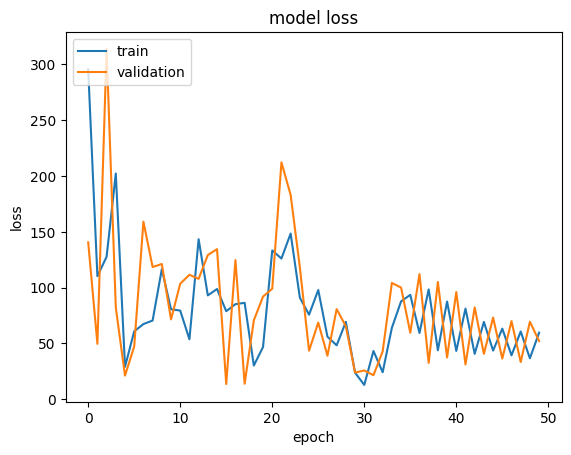

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 2ms/step


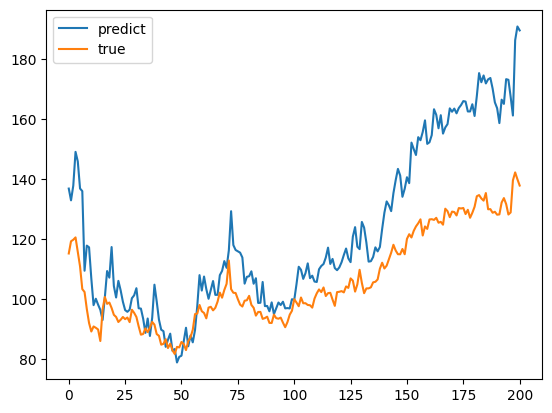

In [44]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='true')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import r2_score
results.loc[len(results)]=["NN",r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]
r2_score(y_test,y_pred)

-0.7502740803790182

In [46]:
from sklearn.neural_network import MLPRegressor

model=MLPRegressor(alpha=0.5,batch_size=100,learning_rate_init=0.0001,shuffle=True,max_iter=1000)
model.fit(X_train,y_train)

MLPRegressor(alpha=0.5, batch_size=100, learning_rate_init=0.0001,
             max_iter=1000)

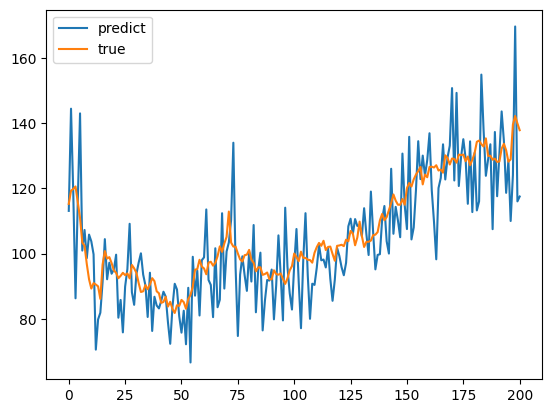

In [47]:
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='true')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import r2_score
results.loc[len(results)]=["MLPRegressor",r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]
r2_score(y_test,y_pred)

0.4715572256008269

In [49]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(X_train,y_train)

DecisionTreeRegressor()

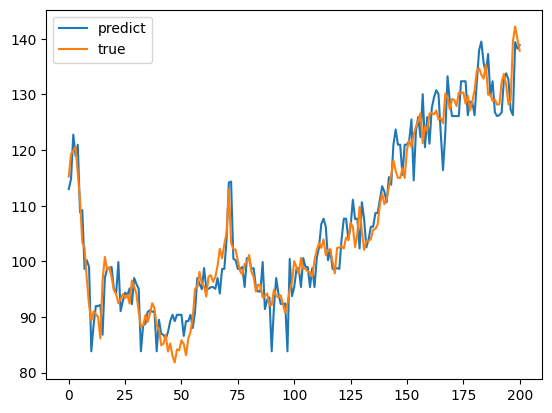

In [50]:
y_pred = clf.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='true')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import r2_score
results.loc[len(results)]=["DecisionTreeRegressor",r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]
r2_score(y_test,y_pred)

0.9387902274645468

In [52]:
!pip install TPOT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=4e7fd8b28b73669d7a8759cd6d6d1926bddeb32bb7ba760bd649b4e617b34b75
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [53]:
# from tpot import TPOTRegressor

# tpot2 = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42,scoring='neg_mean_squared_error')
# tpot2.fit(X_train, y_train)

In [54]:
# tpot2.export('tpot2.py')

In [55]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1)
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: -10.238982838146809
exported_pipeline = LassoLarsCV(normalize=False)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
t_results = exported_pipeline.predict(X_test)



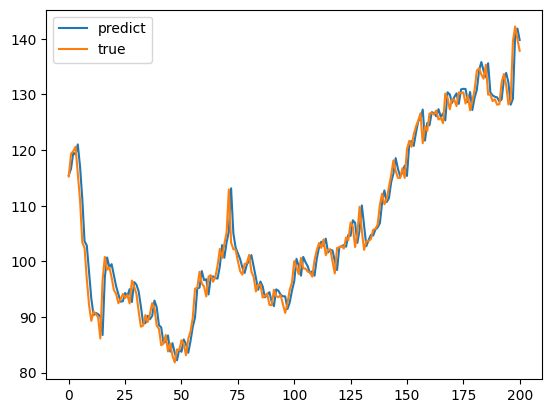

In [56]:
plt.plot(t_results, label='predict')
plt.plot(y_test, label='true')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import r2_score
results.loc[len(results)]=["LassoLarsCV",r2_score(y_test,t_results),mean_absolute_error(y_test,t_results),mean_squared_error(y_test,t_results)]
r2_score(y_test,y_pred)

0.9387902274645468

In [58]:
results

,Model,R2 Score,Mean Absolute Error,Mean Squared Error
0,NN without tsfresh,0.910984,3.789538,21.203301
1,XGBRegressor,0.955282,2.527061,10.601955
2,NN,-0.750274,15.937538,414.961645
3,MLPRegressor,0.471557,8.613790,125.285226
4,DecisionTreeRegressor,0.938790,2.993467,14.511846
5,LassoLarsCV,0.970313,1.984606,7.038380
